In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
import PIL
import PIL.Image
import tensorflow as tf
import glob
import pathlib
from pathlib import Path

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD

In [2]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

This process will retrieve all the pictures in the data set and assign a label based on the folder it was in.

In [3]:
# Directory path
train_data_dir = 'chest_xray/chest_xray/train/'
val_data_dir = 'chest_xray/chest_xray/val/'
test_data_dir = 'chest_xray/chest_xray/test/'


# getting the testing data
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(64, 64), batch_size=600)

# getting the validation set
val_generator = ImageDataGenerator().flow_from_directory(
        val_data_dir, 
        target_size=(64, 64), batch_size=16)

# Get all the data in the directory data/train (790 images), and reshape them
train_generator = ImageDataGenerator(horizontal_flip=True).flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), batch_size=5200)


Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [4]:
# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [ ]:
train_images[0].shape

# EDA

### Going to look at average image

In [ ]:
def image_to_matric(images,labels):
    images = images.reshape(5200,12288)
    images /= 255
    labels = labels.T[[1]][0]
    

In [ ]:
def mean_image(images, label, size = (64,64)):
    

In [ ]:
matrix_image, matrix_labels = 

### Image augmentation for increas in train data

Image augmentation is going to help with overfitting because of how it changes the images. In this case we are going to be flipping images.

In [5]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers


In [7]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.5),
])

In [ ]:
train

In [ ]:
train_labels[0]

In [ ]:
train_generator.class_indices['NORMAL']

In [ ]:
image = train_images[0]
label = train_labels[0]
print(train_generator.labels[0])
plt.imshow(image);
#plt.title()

In [ ]:
image = tf.expand_dims(image,0)
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

In [8]:
X_train = train_images.reshape(5200,12288)
X_test = test_images.reshape(600,12288)
X_val = val_images.reshape(16,12288)

In [9]:
y_train = train_labels.T[[1]][0]
y_test = test_labels.T[[1]][0]
y_val = val_labels.T[[1]][0]

In [10]:
pd.DataFrame(y_train)[0].value_counts()

1.0    3863
0.0    1337
Name: 0, dtype: int64

In [11]:
print(X_train.shape)
print(y_train.shape)

(5200, 12288)
(5200,)


### base model testing

In [12]:
batch_size = 10
num_classes = 2
epochs = 6

In [13]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [14]:
print(X_train.shape)
print(y_train.shape)

(5200, 12288)
(5200, 2)


### standardizing the image values 
This is done so that instead of a value between 0 and 255 we have a value between 0-1 reprenting how much color is there

In [15]:
X_train /= 255
X_test /= 255
X_val /= 255

In [ ]:
train_generator.class_indices

In [ ]:
# model structure
model = Sequential()

# first hidden layer
# 12288 = 64x64x3 = size of image
model.add(Dense(50,activation='relu',input_shape=(12288,)))

# second hidden layer
model.add(Dense(50,activation='relu'))


# output layer
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

history = model.fit(X_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(X_val,y_val))

score = model.evaluate(X_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# CNN

In [ ]:
train_images.shape

In [ ]:
y_train.shape

In [ ]:
from tensorflow.keras import datasets, layers, models

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3,3), activation='relu',input_shape=(64,64,3)))
#model.add(layers.Conv2D(64, (3,3), activation='relu',input_shape=(64,64,3)))
#model.add(Dropout(0.2))
model.add(layers.MaxPool2D((2,2)))

#model.add(layers.SeparableConv2D(64,(3,3),activation='relu'))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
#model.add(layers.Conv2D(64,(3,3),activation='relu'))
#model.add(Dropout(0.1))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(32,(3,3),activation='relu'))
#model.add(Dropout(0.1))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(32,(3,3),activation='relu'))
#model.add(Dropout(0.1))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(2, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_images, y_train, epochs=5,validation_data=(val_images,y_val))

In [ ]:
score = model.evaluate(test_images,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model_augmented = tf.keras.Sequential([
    data_augmentation,

    layers.Conv2D(64, (3,3), activation='relu',input_shape=(64,64,3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),

    layers.MaxPool2D((2,2)),

    layers.Conv2D(32,(3,3),activation='relu'),
    
    layers.MaxPool2D((2,2)),

    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    Dropout(0.2),
    layers.Dense(32, activation='relu'),
    Dropout(0.2),
    layers.Dense(2, activation='sigmoid')
    ])

In [ ]:
model_augmented.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model_augmented.fit(train_images, y_train, epochs=4,validation_data=(val_images,y_val))

In [ ]:
score = model_augmented.evaluate(test_images,test_labels,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_keras = (model_augmented.predict(test_images) > 0.5).astype("int32")

In [ ]:
y_pred_keras

In [ ]:
y_pred_keras = y_pred_keras.T[[1]][0]

In [ ]:
y_true = test_labels.T[[1]][0]

In [ ]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_true, y_pred_keras)


In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
%matplotlib inline

In [ ]:
conf_matrix = confusion_matrix(y_true,y_pred_keras)
df_cm = pd.DataFrame(conf_matrix,columns=['Norm','Pneu'],index=['Norm','Pneu'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

In [ ]:
df_cm

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.set(font_scale=1.4)
ax = sns.heatmap(df_cm,cmap='Blues',annot=True,annot_kws={'size':16});

### trying alex net

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(96, (4,4), activation='relu',input_shape=(64,64,3),padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Conv2D(256, (11,11), activation='relu',input_shape=(64,64,3),padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Conv2D(384, (3,3), activation='relu',input_shape=(64,64,3),padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Conv2D(384, (3,3), activation='relu',input_shape=(64,64,3),padding='same'))

model.add(layers.Conv2D(256, (3,3), activation='relu',input_shape=(64,64,3),padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(4096, activation='relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(1000, activation='relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(2, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_images, y_train, epochs=5,validation_data=(val_images,y_val))

In [ ]:
score = model.evaluate(test_images,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Testing for higher accuracym

Through research I found that a common method for convolutional layers is having 32-32-64-64 filters in that progression. This worked very well and increase predciton abilites from on averag 0.80 to on average 0.86. After this process due to lack of overfitting I continually added layers until overfitting.

In [36]:
model_testing = tf.keras.Sequential([
    data_augmentation,

    layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(64,64,3)),
    layers.MaxPool2D((2,2),strides=2),

    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPool2D((2,2),strides=2),
    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2),strides=2),
    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2),strides=2),
    

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    Dropout(0.2),
    layers.Dense(64, activation='relu'),
    Dropout(0.2),
    layers.Dense(64, activation='relu'),
    Dropout(0.2),
    layers.Dense(64, activation='relu'),
    Dropout(0.2),
    layers.Dense(64, activation='relu'),
    Dropout(0.2),
    layers.Dense(64, activation='relu'),
    Dropout(0.2),
    layers.Dense(64, activation='relu'),
    Dropout(0.2),
    layers.Dense(64, activation='relu'),
    Dropout(0.2),
    layers.Dense(64, activation='relu'),
    Dropout(0.2),
    layers.Dense(2, activation='sigmoid')
    ])

In [37]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model_testing.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [38]:
history = model_testing.fit(train_images, y_train, epochs=50,validation_data=(val_images,y_val))

Epoch 1/50
163/163 [==============================] - 10s 61ms/step - loss: 0.5933 - accuracy: 0.7394 - val_loss: 0.7674 - val_accuracy: 0.5000
Epoch 2/50
163/163 [==============================] - 10s 61ms/step - loss: 0.5736 - accuracy: 0.7429 - val_loss: 0.8322 - val_accuracy: 0.5000
Epoch 3/50
163/163 [==============================] - 10s 61ms/step - loss: 0.5745 - accuracy: 0.7429 - val_loss: 0.8313 - val_accuracy: 0.5000
Epoch 4/50
163/163 [==============================] - 10s 61ms/step - loss: 0.5723 - accuracy: 0.7429 - val_loss: 0.8179 - val_accuracy: 0.5000
Epoch 5/50
163/163 [==============================] - 10s 61ms/step - loss: 0.5243 - accuracy: 0.7431 - val_loss: 0.7804 - val_accuracy: 0.5000
Epoch 6/50
163/163 [==============================] - 10s 62ms/step - loss: 0.4930 - accuracy: 0.7429 - val_loss: 0.6289 - val_accuracy: 0.5000
Epoch 7/50
163/163 [==============================] - 10s 64ms/step - loss: 0.4651 - accuracy: 0.7413 - val_loss: 0.6440 - val_accuracy:

In [39]:
#model_testing.summary()

In [40]:
score = model_testing.evaluate(test_images,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27024412155151367
Test accuracy: 0.8966666460037231


In order to determine what threshold is going to be the best for out predcitions we are going to show ROC curves for each threshold value. The model predicts how likely it thinks each picture belongs to a class. An example prediction would be \[0.387,0.613\] where it thinks it has a 38% chance of not having pneumonia and 61% chance of having pneumonia. The higher we raise the threshold the more confident we have to be that the image has pneumonia for it to be classfied as such.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
threshs = np.arange(0.1,1,0.1)

In [ ]:
threshs

In [ ]:
y_test_roc = y_test.T[[1]][0]
def roc_per_thresh(threshs):
    rocs = []
    for thresh in threshs:
        y_pred_roc = (model_testing.predict(test_images) > thresh).astype('int32')
        y_pred_roc = y_pred_roc.T[[1]][0]
        fpr, tpr, thresholds = roc_curve(y_test_roc, y_pred_roc)
        rocs.append([thresh,fpr,tpr])
    return rocs

In [ ]:
roc_values = roc_per_thresh(threshs)

In [ ]:
roc_values[0]

In [ ]:
plt.figure(1,figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
for roc in roc_values:
    plt.plot(roc[1],roc[2],label=(round(roc[0],1),round(roc[1][1],2),round(roc[2][1],2)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(title=['(FPR,TPR)'])
plt.show()

In [58]:
y_pred = (model_testing.predict(test_images) > 0.4).astype('int32')

In [59]:
y_pred = y_pred.T[[1]][0]

In [ ]:
!pip install lime


In [ ]:
!pip install ipywidgets

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

In [41]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import random

In [42]:
explainer = lime_image.LimeImageExplainer(random_state=1)

In [43]:
y_test = y_test.T[[1]][0]

In [60]:
print("Pred: {} \nTrue: {}".format(y_pred[1],y_test[1]))

Pred: 0 
True: 0.0


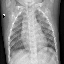

In [61]:
array_to_img(test_images[1])

In [63]:
bad_predictions = (y_pred == y_test)

In [64]:
test_images_lime = test_images.astype('double')

In [65]:
labels = ['Norm','Pneu']


CPU times: user 24 s, sys: 6.4 s, total: 30.4 s
Wall time: 18.4 s


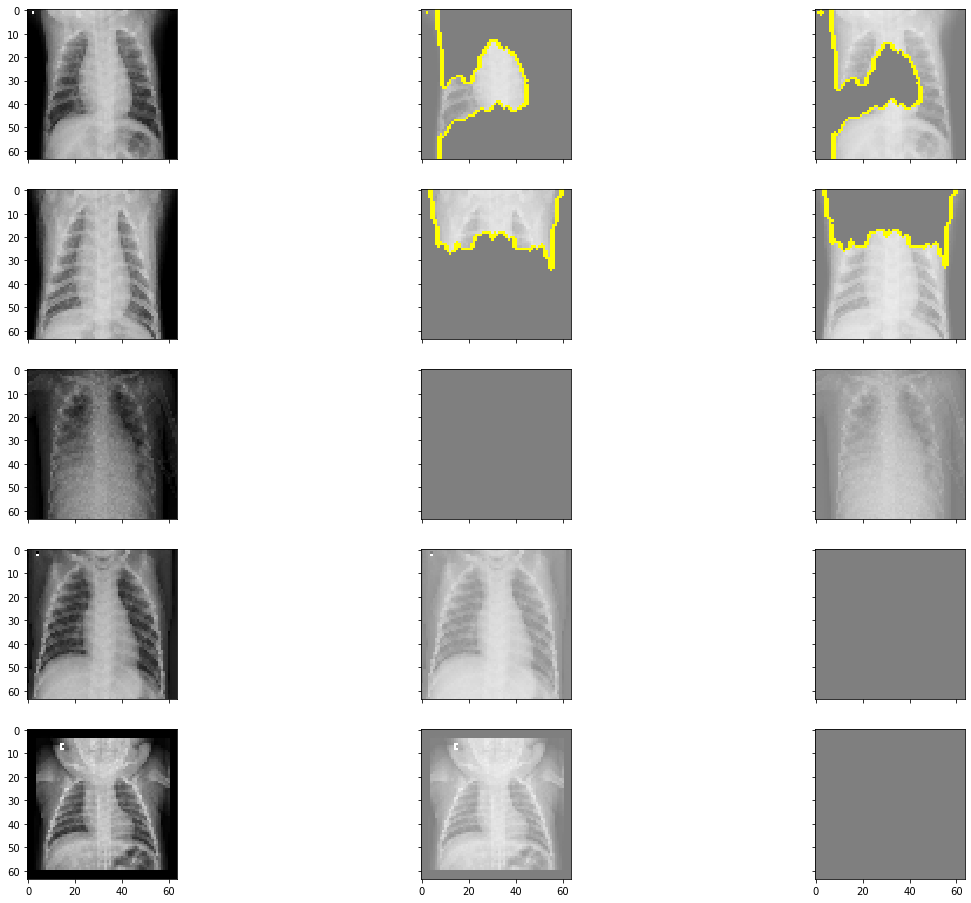

In [66]:
%%time
fig, ax = plt.subplots(5, 3, sharex='col', sharey='row')
fig.set_figwidth(20)
fig.set_figheight(16)
indecies = random.sample(range(sum(bad_predictions)), 5)
for j in range(5):
    explanation = explainer.explain_instance(test_images_lime[bad_predictions][indecies[j]], 
                                             model_testing.predict, 
                                             top_labels=5, hide_color=0, num_samples=1000, 
                                             random_seed=42)
    ax[j,0].imshow(test_images_lime[bad_predictions][indecies[j]])
    for i in range(2):
        temp, mask = explanation.get_image_and_mask(i, positive_only=True, 
                                                    num_features=5, hide_rest=True)
        ax[j,i+1].imshow(mark_boundaries(temp / 2 + 0.5, mask))

In [77]:
test_labels[9]

array([1., 0.], dtype=float32)

In [69]:
def image_outline(i):
    explanation = explainer.explain_instance(test_images[i].astype('double'), model_testing.predict, top_labels=5, hide_color=0, num_samples=1000)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


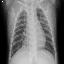

In [70]:
array_to_img(test_images[5])

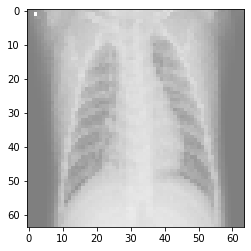

In [84]:
image_outline(5)

In [183]:
pic_number = 7
print("Pred: {} \nTrue: {}".format(y_pred[pic_number],y_test[pic_number]))

Pred: 0 
True: 0.0


In [184]:
explanation = explainer.explain_instance(test_images[pic_number].astype('double'), model_testing.predict, top_labels=5, hide_color=0, num_samples=1000)


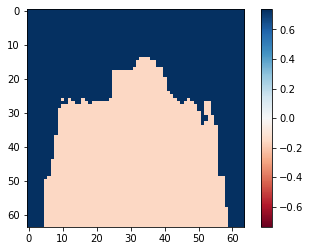

In [185]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

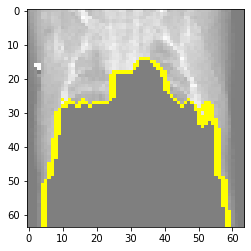

In [186]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

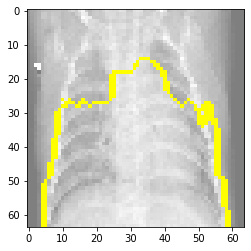

In [187]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

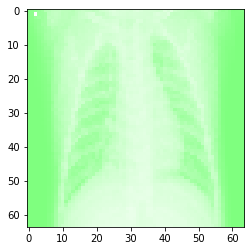

In [178]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))